# Project: Anatomy of a Blockbuster

![alt text](https://i.hurimg.com/i/hdn/75/0x0/5efd9b977152d8036c470a49.jpg "Cinema")

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For over a hundred years, movies have captured the imaginations and hearts of audiences worldwide. Be it in a cinema or at home, through a giant projection or on a laptop screen, somewhere, someone is wwatching a movie. The making of a successful movie is a complex undertaking, involving many different factors. To try to understand what makes a blockbuster as opposed to a flop, we look at [the movie database (TMDB) dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata), which holds information on over 10,000 films.

Specifically, we look at how movies have changed over the years, in terms of budgets and revenues. We also look at movie release schedules and what patterns emerge from the different seasons.

Movie release dates are carefully planned by studios, with the summer and Christmas months considered to be the most profitable [seasons](https://www.quora.com/What-are-considered-the-peak-seasons-for-movie-releases-in-theaters), unlike the so-called "dump" months of the rest of the year. So does profit really correlate with the release date? Are horror films more sucessful at Halloween, for example?

The questions tackled in this study are as follows:

1. How do movie budgets and revenues change across movie genres?
    
2. How do movies differ across the seasons of the yearly release schedule?
    
3. How have film revenues and budgets changed across the years?
    
4. Which release seasons feature the greatest and least numbers of unsuccessful films?

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling


### General Properties

Loading the dataset and having a preliminary look at the first and last few lines:

In [39]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [40]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


Cast and genre columns contain multiple entries separated by "|" characters. These will need to be separated into distinct terms.

In [41]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [42]:
df.shape

(10866, 21)

The TMDB Dataset has over 10,800 movies, from the period 1960 - 2015, and with an average runtime of 102 min (includes entries with a runtime of 0 - these are clearly errors and should be removed prior to analysing runtimes).

Information is provided for each film in 21 categories, listed below along with their datatypes:

In [43]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In the search for what makes a movie successful, columns such as id, imdb_id, homepage, and overview are unlikely to be helpful, as are the vote_count and the vote_average, which are already [taken](https://developers.themoviedb.org/3/getting-started/popularity) into consideration with the popularity values. Furthermore, to compare movies over a period of time, inflation-adjusted values for the budget and revenue (marked as _adj) are more useful than their unadjusted counterparts for a balanced analysis. These columns can therefore be dropped from our analysis.

With respect to the datatypes, the release_date needs to be converted to datetime.

Next, we look at the state of missing data in the dataset.


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [45]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Looking at the number of null values, we see that the homepage column has the greatest number of missing data, which is to be expected as the dataset includes movies preceding the internet. The cast, director, tagline, keywords, genres, and production_companies are also missing values. 

Furthermore, the last lines of the dataset show movies with budgets and revenues with a value of 0, which is more likely to be due to missing values than small budgets of independent films. 

In [46]:
len(df.query('budget_adj == 0'))

5696

In [47]:
len(df.query('revenue_adj == 0'))

6016

In [48]:
len(df.query('runtime == 0'))

31

About 5700 and 6000 movies have their budgets and revenues entered as 0, respectively. These need to be taken into consideration or altogether removed when comparing costs and profits. In addition, 31 movies show a runtime of 0.

Next, we look for any duplicated values.

In [49]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [50]:
df.query('original_title == "TEKKEN"')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


The movie TEKKEN occurs twice in the dataset; the duplicate row must be removed.

## Data Cleaning

To streamline our analysis of the factors that go into the makeup of a successful movie, we will start by removing columns of the features that will not be included in this study, such as id, imdb_id, website, etc. Duplicated rows will also be removed.

The |-separated genres will be split into distinct terms for analysis. 

When analysing different features, rows with missing values or inappropriately entered as zero will be either removed or filled in as indicated below.

The release_date column needs to be converted to datetime so we can extract useful information such as the month, and therefore the season of its release.

In [51]:
df = pd.read_csv('tmdb-movies.csv')

Removing extraneous columns and duplicated columns:

In [52]:
df.drop(['id', 'imdb_id', 'budget', 'revenue', 'homepage', 'overview', 'vote_count', 'vote_average'], axis=1, inplace=True)

In [53]:
df.drop_duplicates(inplace=True)

Removing 31 entries with a runtime of 0:

In [54]:
df.drop(df.index[df['runtime'] == 0], inplace=True)

Replacing null genre values with "missing_genre":

In [55]:
df['genres'].fillna('missing_genre', inplace=True)

Looking at the distribution of the release years of films with adjusted budgets and/or revenues entered as 0:

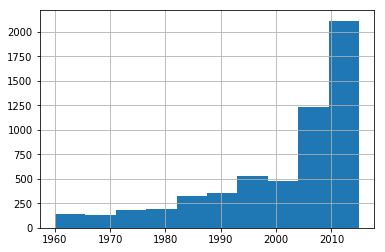

In [56]:
df.query('budget_adj ==0').release_year.hist();

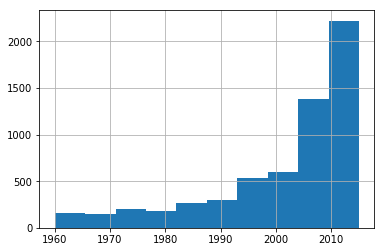

In [57]:
df.query('revenue_adj == 0').release_year.hist();

Entries with adjusted budgets and/or revenues entered as 0 amount to about half the dataset, and their distribution among the dataset is clearly skewed to the left. Replacing these values simply with the mean of the non-zero values, given their proportion of the dataset, is likely to distort patterns of budget and revenue change over time. Therefore, these values will be excluded from the dataset before carrying out the analysis.

In [58]:
df[['budget_adj', 'revenue_adj']].describe() # budget and revenue statistics with zero-entered values included

,budget_adj,revenue_adj
count,1.083400e+04,1.083400e+04
mean,1.759896e+07,5.151599e+07
std,3.434421e+07,1.448190e+08
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,2.094246e+07,3.389667e+07
max,4.250000e+08,2.827124e+09


Removing all entries with 0 budget_adj or revenue_adj:

In [59]:
df.drop(df.index[df['budget_adj'] == 0.0], inplace=True)
df.drop(df.index[df['revenue_adj'] == 0.0], inplace=True)

In [60]:
df[['budget_adj', 'revenue_adj']].describe() # statistics without 0-entered values

,budget_adj,revenue_adj
count,3.854000e+03,3.854000e+03
mean,4.423999e+07,1.370647e+08
std,4.480925e+07,2.161114e+08
min,9.693980e-01,2.370705e+00
25%,1.309053e+07,1.835735e+07
50%,3.001611e+07,6.173068e+07
75%,6.061307e+07,1.632577e+08
max,4.250000e+08,2.827124e+09


Having cleaned the dataset of unnecessary, duplicated, or incorrectly-entered values, we now try to our main questions previously listed in the introduction.

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: How do movie budgets and revenues change across movie genres?

To analyse movie genres, we need to split the given "|"-separated values and extract the first genre as the main one. 

Copying the genres column into a new dataframe "missing_genre":

In [61]:
expanded_genres = df['genres']
expanded_genres.fillna('missing_genre', inplace=True)

Splitting each genre into a new column, and then extracting the first genre into a new dataframe 'first_genre' with one column, 'genre':

In [62]:
expanded_genres = expanded_genres.str.split("|", expand=True)


In [63]:
first_genre = expanded_genres[0]
first_genre_df = pd.DataFrame(first_genre)
first_genre_df.rename(columns={0: 'genre'}, inplace=True)
first_genre_df

,genre
0,Action
1,Action
2,Adventure
3,Action
4,Action
5,Western
6,Science Fiction
7,Drama
8,Family
9,Comedy


We have now extracted the first genre keyword, usually the main one, from the original genres column:

In [64]:
first_genre_df['genre'].value_counts()

Drama              890
Comedy             787
Action             689
Adventure          314
Horror             275
Crime              171
Thriller           160
Fantasy            110
Animation          103
Science Fiction     98
Romance             66
Family              40
Mystery             36
Documentary         32
Music               29
War                 20
History             17
Western             16
TV Movie             1
Name: genre, dtype: int64

Merging the first_genre dataframe back with the original df to give the adjusted df:

In [65]:
df_adj = df.merge(first_genre_df, left_index=True, right_index=True)

Dropping the original genres column and looking at the adjusted df with separated genre column:

In [66]:
df_adj.drop(['genres'], axis=1, inplace=True)
df_adj.head()

,popularity,original_title,cast,director,tagline,keywords,runtime,production_companies,release_date,release_year,budget_adj,revenue_adj,genre
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09,Action
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,1.379999e+08,3.481613e+08,Action
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,1.012000e+08,2.716190e+08,Adventure
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,1.839999e+08,1.902723e+09,Action
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,1.747999e+08,1.385749e+09,Action


In [67]:
df_adj.groupby('genre').revenue_adj.mean()

genre
Action             1.626525e+08
Adventure          3.041586e+08
Animation          2.959841e+08
Comedy             1.006022e+08
Crime              9.841484e+07
Documentary        2.363154e+07
Drama              9.096426e+07
Family             2.728411e+08
Fantasy            1.943293e+08
History            1.680665e+08
Horror             7.877088e+07
Music              1.285718e+08
Mystery            8.748986e+07
Romance            1.242896e+08
Science Fiction    2.171706e+08
TV Movie           5.838910e+07
Thriller           9.109040e+07
War                1.405774e+08
Western            1.158031e+08
Name: revenue_adj, dtype: float64

Comparing the average budgets and revenues of different movie genres (excluding those with missing genre data):

In [68]:
df_adj_2 = df_adj.query('genre != "missing_genre"')

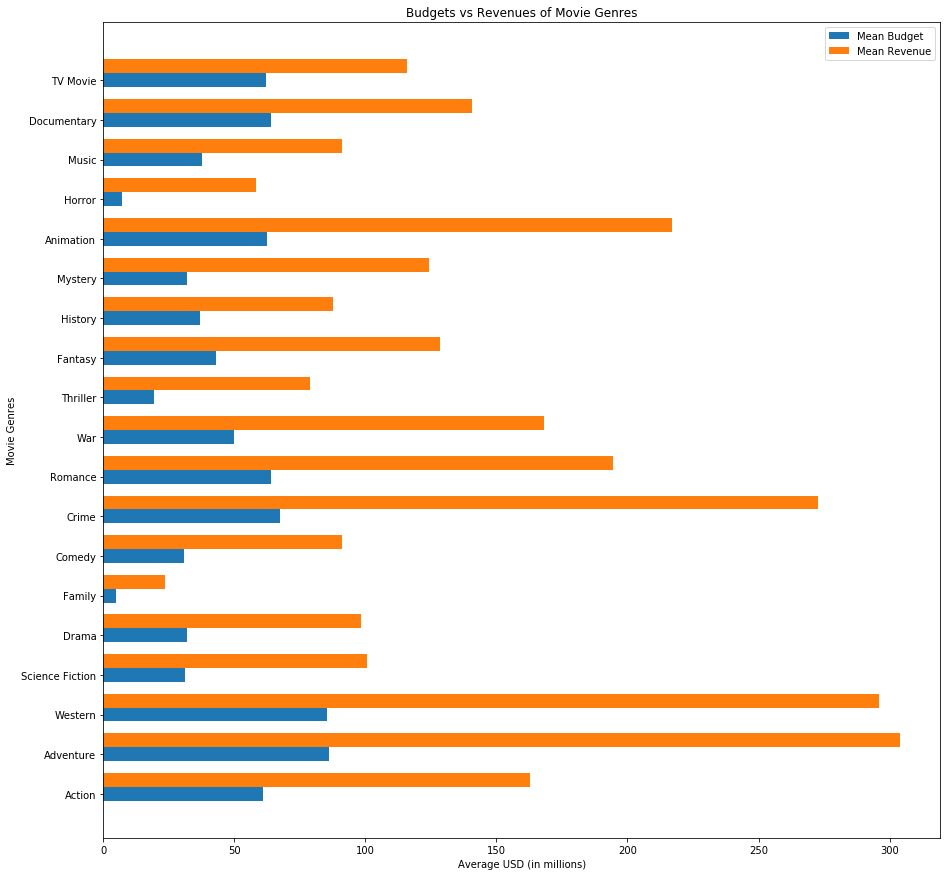

In [69]:
genre_budgets = (df_adj_2.groupby('genre').budget_adj.mean())/1000000
genre_revenues = (df_adj_2.groupby('genre').revenue_adj.mean())/1000000

labels = df_adj_2['genre'].unique()

x = np.arange(len(labels))  
width = 0.35 

fig, ax = plt.subplots(figsize=(15,15))
ax.barh(x, genre_budgets, width, label='Mean Budget')
ax.barh(x + width, genre_revenues, width, label='Mean Revenue')


ax.set_xlabel('Average USD (in millions)')
ax.set_ylabel('Movie Genres')
ax.set_title('Budgets vs Revenues of Movie Genres')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend()

plt.show()

As shown above, the most profitable movie genres appear to be Adventure and Westerns, while Horror films show the greatest return on investment, given their relatively much lower budgets.

### Question 2: How do movies differ across the seasons of the yearly release schedule?

Answering this question requires being able to extract and analyse the month of release for each film. 

Converting release_date to datetime and extracting the release month:

In [70]:
df_adj['release_date'] = pd.to_datetime(df_adj['release_date'])
df_adj['release_month'] = df_adj['release_date'].dt.month

Classifying release months into [seasons](https://www.quora.com/What-are-considered-the-peak-seasons-for-movie-releases-in-theaters): Dump1(1-4), Summer(5-7), Dump2(8-9), Halloween(10), Christmas(11-12)

In [71]:
bin_edges = [0, 4, 7, 9, 10, 13]
seasons = ['Dump1', 'Summer', 'Dump2', 'Halloween', 'Christmas']
df_adj['season'] = pd.cut(df_adj['release_month'], bin_edges, labels=seasons)

In [72]:
df_adj.query('season == "Dump1"')

,popularity,original_title,cast,director,tagline,keywords,runtime,production_companies,release_date,release_year,budget_adj,revenue_adj,genre,release_month,season
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015,1.012000e+08,2.716190e+08,Adventure,3,Dump1
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015,1.747999e+08,1.385749e+09,Action,4,Dump1
11,6.189369,Jupiter Ascending,Mila Kunis|Channing Tatum|Sean Bean|Eddie Redm...,Lana Wachowski|Lilly Wachowski,Expand your universe.,jupiter|space|woman director|3d|interspecies r...,124,Village Roadshow Pictures|Dune Entertainment|A...,2015-02-04,2015,1.619199e+08,1.692686e+08,Science Fiction,2,Dump1
12,6.118847,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,There is nothing more human than the will to s...,dancing|artificial intelligence|helicopter|dis...,108,DNA Films|Universal Pictures International (UP...,2015-01-21,2015,1.379999e+07,3.391985e+07,Drama,1,Dump1
14,5.944927,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,A New Age Has Come.,marvel comic|comic|sequel|superhero|vision,141,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,2015,2.575999e+08,1.292632e+09,Action,4,Dump1
16,5.749758,Taken 3,Liam Neeson|Forest Whitaker|Maggie Grace|Famke...,Olivier Megaton,It Ends Here,revenge|murder|on the run|fugitive|framed,109,Twentieth Century Fox Film Corporation|M6 Film...,2015-01-01,2015,4.415998e+07,2.997096e+08,Crime,1,Dump1
18,5.556818,Cinderella,Lily James|Cate Blanchett|Richard Madden|Helen...,Kenneth Branagh,Midnight is just the beginning.,cinderella|magic|fairy tale|princess|shoe,112,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,2015-03-12,2015,8.739996e+07,4.989630e+08,Romance,3,Dump1
23,4.710402,Fifty Shades of Grey,Dakota Johnson|Jamie Dornan|Jennifer Ehle|Eloi...,Sam Taylor-Johnson,Are you curious?,based on novel|billionaire|bdsm|woman director...,125,Focus Features|Trigger Street Productions|Mich...,2015-02-11,2015,3.679998e+07,5.240791e+08,Drama,2,Dump1
27,4.503789,Kingsman: The Secret Service,Taron Egerton|Colin Firth|Samuel L. Jackson|Mi...,Matthew Vaughn,Manners maketh man.,spy|great britain|secret organization|secret a...,130,Twentieth Century Fox Film Corporation|Marv Fi...,2015-01-24,2015,7.451997e+07,3.714978e+08,Crime,1,Dump1
31,3.899557,Chappie,Sharlto Copley|Dev Patel|Ninja|Yolandi Visser|...,Neill Blomkamp,I am consciousness. I am alive. I am Chappie.,artificial intelligence|android|robot|near fut...,120,Columbia Pictures|Media Rights Capital|Sony Pi...,2015-03-04,2015,4.507998e+07,9.390369e+07,Crime,3,Dump1


Taking into account length of release seasons:

In [73]:
df_adj['season_len'] = df_adj['season']

In [74]:
season_lengths = {'Dump1': 4, 'Summer': 3, 'Dump2': 2, 'Halloween': 1, 'Christmas': 2}
df_adj.season_len = [season_lengths[item] for item in df_adj.season_len]

#### Comparing mean revenues per month for each release season

In [75]:
df_adj['norm_rev'] = df_adj['revenue_adj']/df_adj['season_len']
df_adj.groupby('season').norm_rev.sum()

season
Dump1        2.602950e+10
Summer       6.437938e+10
Dump2        2.958802e+10
Halloween    3.675235e+10
Christmas    6.753138e+10
Name: norm_rev, dtype: float64

The Christmas and Summer seasons are indeed the most profitable, resulting in revenues at least twice those obtained during the dump seasons. Film budgets for these seasons follow a similar pattern.

#### Horror films and Halloween

While some horror films are released throughout the year, the biggest and most anticipated releases usually occur during the month of October for Halloween season. Here we compare the number of horror releases during Halloween vs the rest of the year, and the obtained revenues from these movies.

In [76]:
horrors = df_adj.query('genre == "Horror"')
hh = horrors.query('season == "Halloween"')
not_hh= horrors.query ('season != "Halloween"')


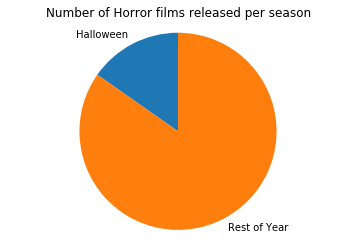

In [77]:
total_num = len(hh) + len(not_hh)
prop_hh = len(hh) / total_num
prop_not_hh = len(not_hh) / total_num

labels = 'Halloween', 'Rest of Year'
sizes = [prop_hh, prop_not_hh]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, startangle=90)
ax1.axis('equal')
ax1.set_title('Number of Horror films released per season')

plt.show()


Only a minority of the total horror releases are during Halloween season, as shown above. But is this strategy really profitable for film studios?

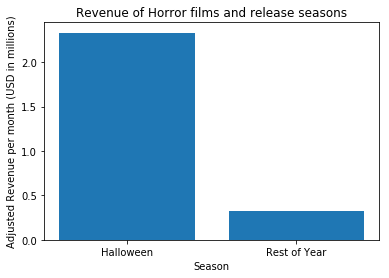

In [78]:
num_hh = len(hh)
num_not_hh = len(not_hh)

hh_mean = (hh['revenue_adj'].mean())/1000000
not_hh_mean = (not_hh['revenue_adj'].mean())/1000000
plt.bar([1,2],[hh_mean/num_hh, not_hh_mean/num_not_hh], tick_label=['Halloween', 'Rest of Year'])
plt.xlabel('Season')
plt.ylabel('Adjusted Revenue per month (USD in millions)')
plt.title('Revenue of Horror films and release seasons');

The answer is a screaming yes! Horror films released in October are overwhelmingly more profitable than those released during the rest of the year.

### Question 3: How have film revenues and budgets changed across the years?

Here we use scatter plots to look at the relationship between movie release years and their respective budgets and revenues.

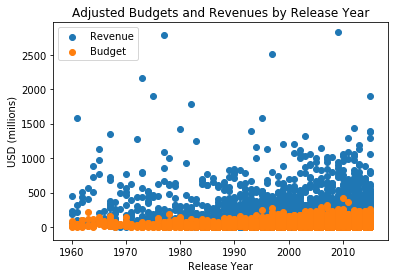

In [79]:
revenue = plt.scatter(df_adj['release_year'], (df_adj['revenue_adj']/1000000));
budget = plt.scatter(df_adj['release_year'], (df_adj['budget_adj']/1000000));
plt.legend((revenue, budget),('Revenue', 'Budget'));
plt.xlabel('Release Year')
plt.ylabel('USD (millions)')
plt.title('Adjusted Budgets and Revenues by Release Year');

With time, both budgets and revenues show an upward trend, which is more pronounced in the latter, indicating that films have become more profitable with time.

### Question 4: Which release seasons feature the greatest and least numbers of unsuccessful films?

To decide whether a film is successful, we calculate the revenue-to-budget ('rtb') ratio for each film:

In [80]:
df_adj['rtb'] = df_adj['revenue_adj']/df['budget_adj']

Defining flops as movies that failed to break even, and therefore have an rtb ratio of less than 1:

In [81]:
flops = df_adj.query('rtb < 1')
flops

,popularity,original_title,cast,director,tagline,keywords,runtime,production_companies,release_date,release_year,budget_adj,revenue_adj,genre,release_month,season,season_len,norm_rev,rtb
57,2.575711,Mortdecai,Johnny Depp|Gwyneth Paltrow|Ewan McGregor|Paul...,David Koepp,Sophistication Has a Name.,based on novel|painting|debt|art dealer|stolen...,106,Lionsgate|Mad Chance|OddLot Entertainment|Huay...,2015-01-21,2015,5.519998e+07,2.798506e+07,Comedy,1,Dump1,4,6.996266e+06,0.506976
59,2.550747,Blackhat,Chris Hemsworth|Leehom Wang|Tang Wei|Viola Dav...,Michael Mann,We are no longer in control.,terrorist|technology|anti hero|hacker|computer...,133,Universal Pictures|Forward Pass|Legendary Pict...,2015-01-13,2015,6.439997e+07,1.633270e+07,Mystery,1,Dump1,4,4.083174e+06,0.253613
66,2.345821,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,Ron Howard,Based on the incredible true story that inspir...,suicide|ocean|sea|hunger|shipwreck,122,Imagine Entertainment|Spring Creek Productions...,2015-11-20,2015,9.199996e+07,8.631506e+07,Thriller,11,Christmas,2,4.315753e+07,0.938208
73,2.234573,Pan,Levi Miller|Garrett Hedlund|Hugh Jackman|Roone...,Joe Wright,Every legend has a beginning.,flying|magic|fairy tale|peter pan|mermaid,111,Warner Bros.|Moving Picture Company (MPC)|Berl...,2015-09-24,2015,1.379999e+08,1.181172e+08,Adventure,9,Dump2,2,5.905860e+07,0.855922
84,2.026651,Tracers,Marie Avgeropoulos|Taylor Lautner|Adam Rayner|...,Daniel Benmayor,It's not a crime if they can't catch you.,chinese mafia|parkour|new york city|loan shark...,94,Temple Hill Entertainment|Senator Film|Freerun...,2015-01-15,2015,1.012000e+07,1.714249e+06,Action,1,Dump1,4,4.285623e+05,0.169392
87,1.980039,Maggie,Arnold Schwarzenegger|Abigail Breslin|Joely Ri...,Henry Hobson,Don't Get Bitten,post-apocalyptic|dystopia|zombies,95,Lionsgate|Grindstone Entertainment Group|Silve...,2015-05-08,2015,3.679998e+06,1.721430e+05,Horror,5,Summer,3,5.738099e+04,0.046778
89,1.956320,Child 44,Tom Hardy|Gary Oldman|Noomi Rapace|Joel Kinnam...,Daniel Espinosa,How do you find a killer who doesnâ€™t exist?,murder|serial killer|military|chili|soviet union,137,Summit Entertainment|Scott Free Productions|Wo...,2015-03-15,2015,4.599998e+07,3.058382e+06,Crime,3,Dump1,4,7.645956e+05,0.066487
106,1.499614,Scouts Guide to the Zombie Apocalypse,Tye Sheridan|Logan Miller|Joey Morgan|Sarah Du...,Christopher B. Landon,Always bring protection.,female nudity|shotgun|nudity|strip club|party,93,Paramount Pictures|Oops Doughnuts Productions|...,2015-10-23,2015,1.379999e+07,1.367190e+07,Comedy,10,Halloween,1,1.367190e+07,0.990718
109,1.449072,Heist,Jeffrey Dean Morgan|Robert De Niro|Kate Boswor...,Scott Mann,Never make a bet you can't afford to lose.,casino|robbery|bus hijacking|heist,93,Emmett/Furla Films|Silver Plane Films|Mass Hys...,2015-11-13,2015,8.187996e+06,4.612510e+04,Crime,11,Christmas,2,2.306255e+04,0.005633
111,1.443406,Dark Places,Charlize Theron|Nicholas Hoult|Christina Hendr...,Gilles Paquet-Brenner,"In 1985, her entire family was murdered. 30 ye...",prison|based on novel|brother sister relations...,113,Denver and Delilah Productions|Mandalay Vision...,2015-03-31,2015,1.839999e+07,1.919009e+05,Drama,3,Dump1,4,4.797522e+04,0.010429


Looking at the release season patterns of movies that failed to break even (calculating the number of flops per season as a proportion of the total number of films released that season):

In [82]:
flops['season'].value_counts()
num_season = len(df_adj.groupby('season'))

(flops['season'].value_counts())/num_season


Dump1        60.8
Dump2        59.6
Summer       37.6
Christmas    31.8
Halloween    24.6
Name: season, dtype: float64

As expected, more films that fail to break even are released in the so-called "dump" seasons. The season with the least incidence of "flops" appears to be Halloween.

<a id='conclusions'></a>
## Conclusions

In this study, we analysed some aspects of the TMDB DataSet to try to answer the questions listed below. One major limitation of this dataset is the incorrect entry of arounf half the budget and/or revenue values as 0, resulting in their exclusion of the analysis. A comparison of the results obtained here with those of a bigger dataset following the correction of the entries would be worthwhile.

_1. How do movie budgets and revenues change across movie genres?_

Using a grouped bar chart, we gave an overview of the mean revenues and budgets of each movie genre. One limitation here is that the analysis was restricted to the first genre listed in the genres column. Classifying a film into a single genre can be difficult, and a more general view may be obtained from taking all the listed genres into account.
    
_2. How do movies differ across the seasons of the yearly release schedule?_

The success of movies is not uniform throughout the year, with the highest revenues obtained during the summer and Christmas seasons. Furthermore, despite the fewer number of horror films released during Halloween, this season sees the majority of horror revenues compared to the rest of the year.
    
    
_3. How have film revenues and budgets changed across the years?_

There is a high degree of variability in the data, due to missing and inaccurate values entered for budgets and revenues. However, with the use of scatter plots, we can see that there is an upward trend in both budgets and revenues (adjusted for inflation), with higher increases in revenues.
    
_4. Which release seasons feature the greatest and least numbers of unsuccessful films?_

Defining unsucessful films as those whose revenue-to-budget ratios is less than 1, we can see that these releases correlate more with the dump seasons. However, it is unclear if revenues are restricted to cinema earnings. If so, this would miss films which become more successful over time in the case of home cinema/DVD/streaming. As the DataSet is updated to include more recent films, this will be become more of a necessity.



In [83]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0